# Análisis exploratorio

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Lectura del dataset:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, auc, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

ruta_archivo = '/content/drive/MyDrive/ProyectoGrupalSIGE/dataset/cybersecurity_attacks.csv'
df = pd.read_csv(ruta_archivo)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
# Información sobre el dataset
print("Columnas del Dataset")
df.columns

Columnas del Dataset


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
print("Tamaño del Dataset")
df.shape

Tamaño del Dataset


(40000, 25)

In [ ]:
print("Contenido del Dataset")
df.head().T

Contenido del Dataset


,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [ ]:
# Número de valores nulos
print("Número de valores nulos de cada variable")
df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Número de valores nulos de cada variable


,0
Alerts/Warnings,20067
IDS/IPS Alerts,20050
Malware Indicators,20000
Firewall Logs,19961
Proxy Information,19851


In [ ]:
# Proporción de valores nulos
print("Proporción de valores nulos de cada variable")
df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)/ len(df) * 100

Proporción de valores nulos de cada variable


,0
Alerts/Warnings,50.1675
IDS/IPS Alerts,50.1250
Malware Indicators,50.0000
Firewall Logs,49.9025
Proxy Information,49.6275


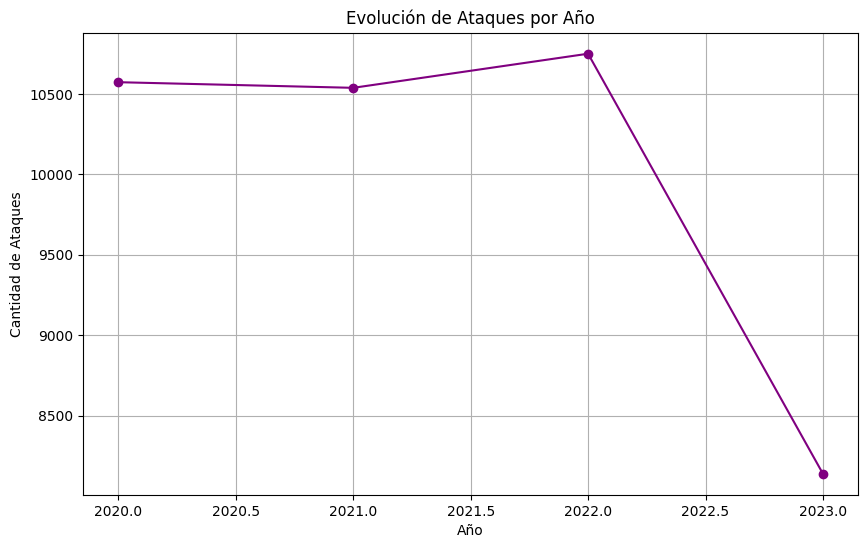

In [ ]:
# Evolución de ataques en función del año
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['year'] = df['Timestamp'].dt.year

attacks_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
attacks_per_year.plot(marker='o', linestyle='-', color='purple')
plt.title("Evolución de Ataques por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Ataques")
plt.grid(True)
plt.show()

Geo-location Data
Ghaziabad, Meghalaya                       16
Kalyan-Dombivli, Jharkhand                 15
Ghaziabad, Uttarakhand                     14
Ghaziabad, Tripura                         14
Motihari, Odisha                           13
Srikakulam, Uttarakhand                    13
Yamunanagar, Arunachal Pradesh             13
Kottayam, Nagaland                         13
Ghaziabad, Jharkhand                       13
Aurangabad, Nagaland                       13
Amroha, Sikkim                             13
Raurkela Industrial Township, Jharkhand    12
Patna, Karnataka                           12
Ghaziabad, Nagaland                        12
Bally, Maharashtra                         12
Ghaziabad, Odisha                          12
Rampur, Gujarat                            12
Jalna, Andhra Pradesh                      12
Aurangabad, Odisha                         12
Imphal, Assam                              12
Name: count, dtype: int64


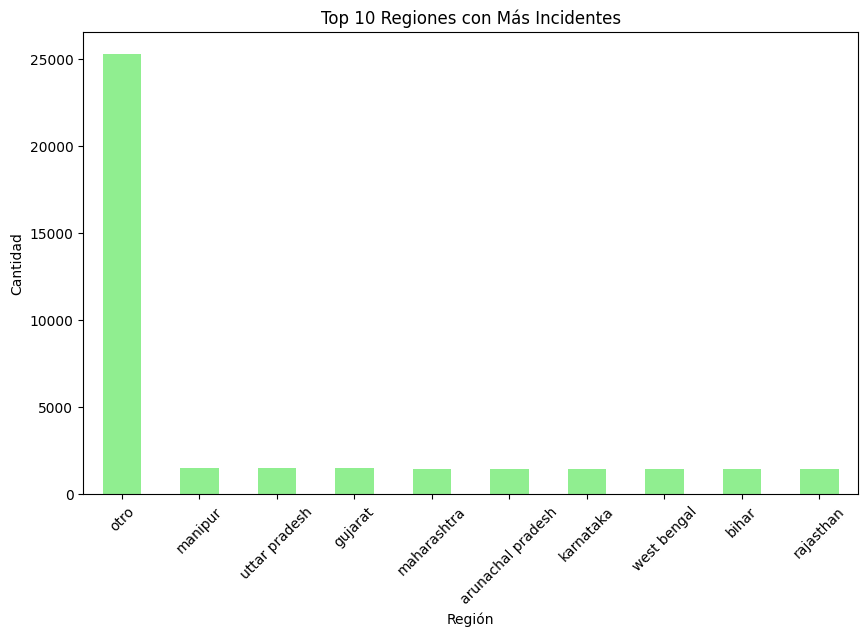

In [ ]:
df['country'] = df['Geo-location Data'].str.split(', ').str[-1]

print(df['Geo-location Data'].value_counts().head(20))

df['region'] = df['Geo-location Data'].apply(lambda x: x.split(', ')[-1].lower() if x != 'Otro' else 'otro')
top_regiones = df[df['region'] != 'otro']['region'].value_counts().nlargest(10).index
df['region'] = df['region'].apply(lambda x: x if x in top_regiones else 'otro')

plt.figure(figsize=(10,6))
df['region'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Regiones con Más Incidentes")
plt.xlabel("Región")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


#plt.figure(figsize=(10,6))
#df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
#plt.title("Top 10 Países con Más Incidentes")
#plt.xlabel("País")
#plt.ylabel("Cantidad")
#plt.xticks(rotation=45)
#plt.show()

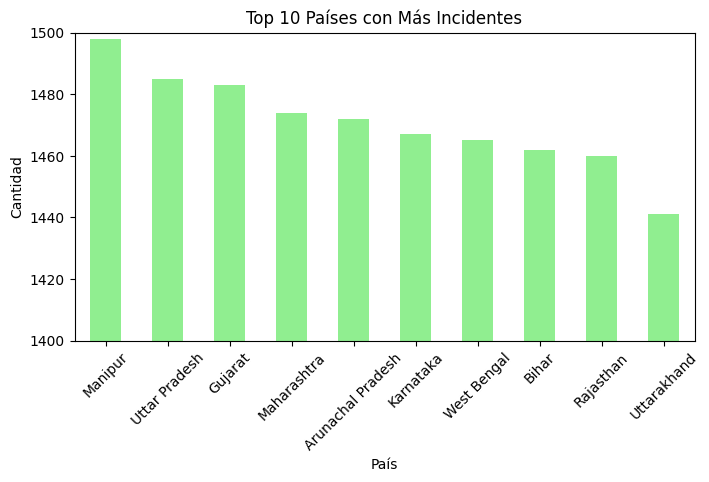

In [ ]:
plt.figure(figsize=(8,4))
plt.ylim(1400, 1500)
df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Países con Más Incidentes")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

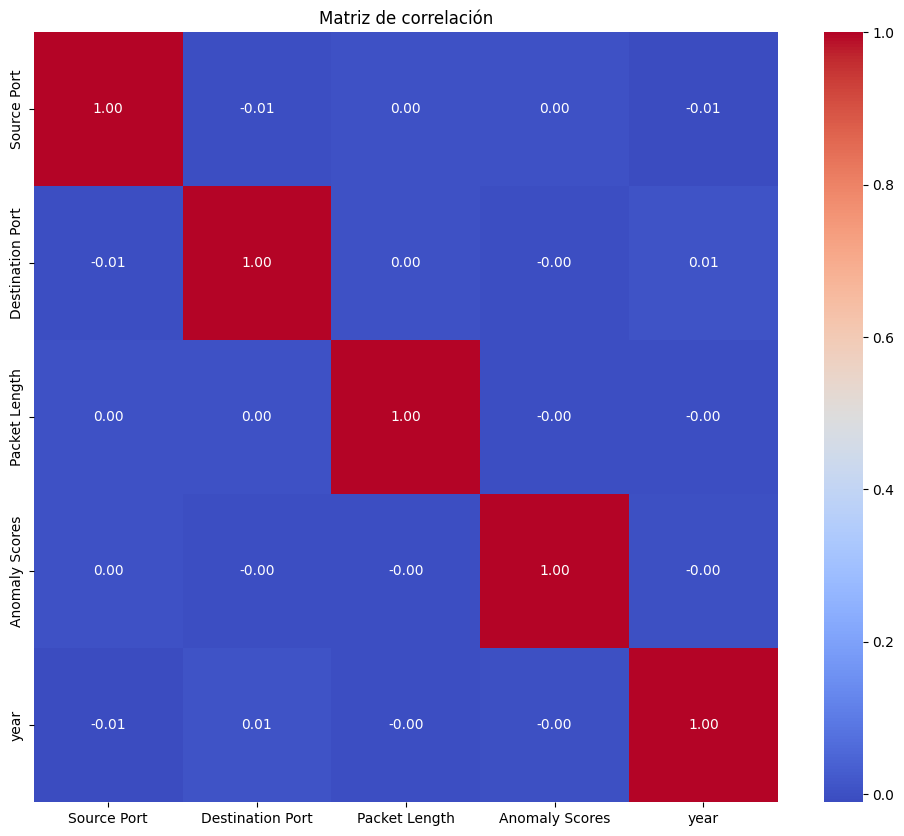

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Preprocesamiento de datos

In [ ]:
columnas_a_eliminar = [
    'Timestamp',
    'Source IP Address',
    'Destination IP Address',
    'Payload Data',
    'User Information',
    'Log Source',
]

# Eliminar solo las columnas que están presentes en el DataFrame
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df.drop(columns=columnas_existentes, inplace=True)

In [ ]:
# Comprobar valores binarios
alerts_unique = df['Alerts/Warnings'].unique()
print(alerts_unique)

ids_unique = df['IDS/IPS Alerts'].unique()
print(ids_unique)

malware_unique = df['Malware Indicators'].unique()
print(malware_unique)

firewall_unique = df['Firewall Logs'].unique()
print(firewall_unique)

proxy_unique = df['Proxy Information'].unique()
print(proxy_unique)

# A pesar de no tener valores nulos, se ha observado que podría pasarse a binario la columna Attack Signature
attack_unique = df['Attack Signature'].unique()
print(attack_unique)

[nan 'Alert Triggered']
[nan 'Alert Data']
['IoC Detected' nan]
['Log Data' nan]
['150.9.97.135' nan '114.133.48.179' ... '60.51.30.46' '137.76.130.8'
 '112.169.115.139']
['Known Pattern B' 'Known Pattern A']


In [ ]:
# Paso a binarios para todas las columnas
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 1 if x == 'Alert Triggered' else 0)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 1 if x == 'Alert Data' else 0)
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 1 if x == 'Log Data' else 0)
df['Attack Signature'] = df['Attack Signature'].apply(lambda x: 'A' if x != 'Known Pattern B' else 'B')

# Nueva variable que resume las tres alertas clave
df['Triple_Alert'] = (
    (df['Malware Indicators'] == 1) &
    (df['Firewall Logs'] == 1) &
    (df['IDS/IPS Alerts'] == 1)
).astype(int)

# Para la columna Proxy Information, sustituimos los valores nulos por 'Sin proxy'
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'Sin proxy' if pd.isna(x) else x)

In [ ]:
# Comprobación de cambios
alerts_unique = df['Alerts/Warnings'].unique()
print(alerts_unique)

ids_unique = df['IDS/IPS Alerts'].unique()
print(ids_unique)

malware_unique = df['Malware Indicators'].unique()
print(malware_unique)

firewall_unique = df['Firewall Logs'].unique()
print(firewall_unique)

proxy_unique = df['Proxy Information'].unique()
print(proxy_unique)

attack_unique = df['Attack Signature'].unique()
print(attack_unique)

[0 1]
[0 1]
[1 0]
[1 0]
['150.9.97.135' 'Sin proxy' '114.133.48.179' ... '60.51.30.46'
 '137.76.130.8' '112.169.115.139']
['B' 'A']


Para comprobar el número de ataques que encontraremos en función del navegador, creamos una nueva columna a partir de la columna 'Device Information'

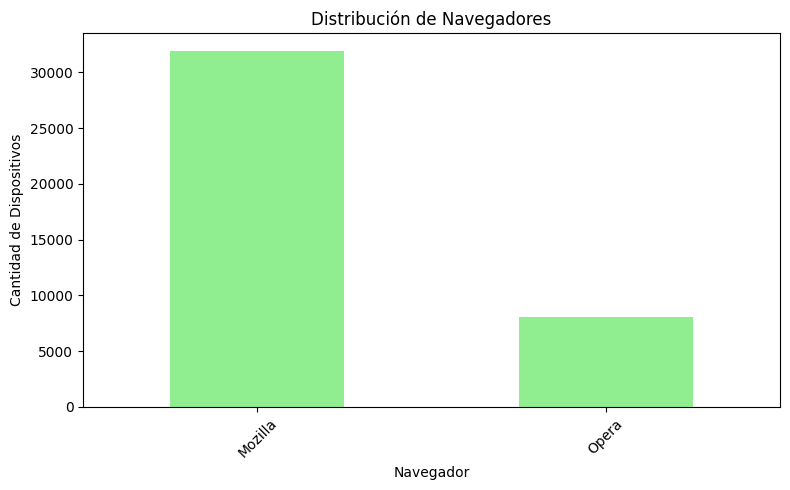

In [ ]:
# Extracción del navegador
df['Browser'] = df['Device Information'].str.split('/').str[0]
conteo_browser = df['Browser'].value_counts()

plt.figure(figsize=(8, 5))
conteo_browser.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Navegadores')
plt.xlabel('Navegador')
plt.ylabel('Cantidad de Dispositivos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Consulta los sistemas operativos
df['Device Information'].value_counts()

,count
Device Information,
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0),35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1),34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0),33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0),31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1),31
...,...
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8 rv:2.0; kk-KZ) AppleWebKit/532.10.1 (KHTML, like Gecko) Version/4.0.2 Safari/532.10.1",1
"Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2 (KHTML, like Gecko) Chrome/56.0.889.0 Safari/534.2",1
"Mozilla/5.0 (Windows; U; Windows NT 6.2) AppleWebKit/535.20.3 (KHTML, like Gecko) Version/4.0 Safari/535.20.3",1


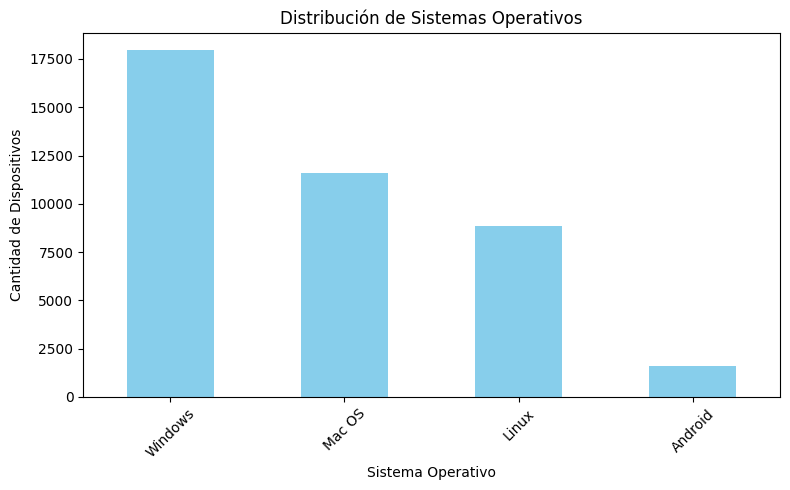

In [ ]:
# Extracción de los sistemas operativos
def simplificar_so(x):
    x = str(x)
    if re.search(r'Windows', x):
        return 'Windows'
    elif re.search(r'Linux', x):
        return 'Linux'
    elif re.search(r'Android', x):
        return 'Android'
    elif re.search(r'Mac OS', x):
        return 'Mac OS'
    else:
        return 'Otro'

df['SO'] = df['Device Information'].apply(simplificar_so)
#df.drop(columns=['Device Information'], inplace=True)

conteo_so = df['SO'].value_counts()

plt.figure(figsize=(8, 5))
conteo_so.plot(kind='bar', color='skyblue')
plt.title('Distribución de Sistemas Operativos')
plt.xlabel('Sistema Operativo')
plt.ylabel('Cantidad de Dispositivos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Número de iPads: 1551
Número de iPods: 2656
Número de iPhones: 4223
Número de Macintosh: 5813


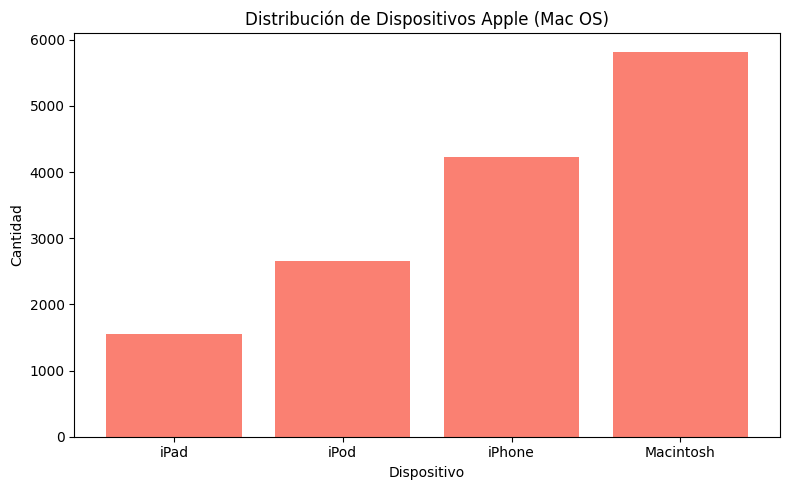

In [ ]:
# Dentro de Mac OS encontramos 4 dispositivos: iPad, iPod, iPhone y Macintosh
num_ipad = df['Device Information'].str.contains(r'iPad', case=False).sum()
num_ipod = df['Device Information'].str.contains(r'iPod', case=False).sum()
num_iphone = df['Device Information'].str.contains(r'iPhone', case=False).sum()
num_mac = df['Device Information'].str.contains(r'Macintosh', case=False).sum()

print(f"Número de iPads: {num_ipad}")
print(f"Número de iPods: {num_ipod}")
print(f"Número de iPhones: {num_iphone}")
print(f"Número de Macintosh: {num_mac}")

dispositivos_mac = {
    'iPad': num_ipad,
    'iPod': num_ipod,
    'iPhone': num_iphone,
    'Macintosh': num_mac
}

plt.figure(figsize=(8, 5))
plt.bar(dispositivos_mac.keys(), dispositivos_mac.values(), color='salmon')
plt.title('Distribución de Dispositivos Apple (Mac OS)')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Simplificar el SO
def simplificar_so(x):
    x = str(x)
    if re.search(r'Windows', x):
        return 'Windows'
    elif re.search(r'Linux', x):
        return 'Linux'
    elif re.search(r'Android', x):
        return 'Android'
    elif re.search(r'Mac OS', x):
        return 'Mac OS'
    else:
        return 'Otro'

df['SO'] = df['Device Information'].apply(simplificar_so)

# 2. Variable binaria de ataque:
df['es_ataque'] = df['Attack Type'].apply(lambda x: 0 if x == 'Benigno' else 1)

# 3. Columnas categóricas y numéricas:
cat_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Signature', 'Action Taken',
            'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'SO', 'Browser']

num_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
            'Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Firewall Logs', 'Triple_Alert']

# 4. One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = ohe.fit_transform(df[cat_cols])

# 5. Escalado de numéricas
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_cols])

# 6. X e y
X = np.hstack([num_scaled, cat_encoded])
y = df['es_ataque']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8. Modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 9. Evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

# 10. Predecir en todo el dataset
df['proba_ataque'] = clf.predict_proba(X)[:,1]

# 11. Riesgo medio por SO
riesgo_por_so = df.groupby('SO')['proba_ataque'].mean().sort_values(ascending=False)

# 12. Visualización
plt.figure(figsize=(8,5))
riesgo_por_so.plot(kind='bar', color='salmon')
plt.title('Riesgo promedio de ataque por Sistema Operativo')
plt.xlabel('Sistema Operativo')
plt.ylabel('Probabilidad promedio de ataque')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocesamiento extra

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Device Information', 'Network Segment',
       'Geo-location Data', 'Firewall Logs', 'IDS/IPS Alerts', 'Triple_Alert',
       'Browser', 'SO', 'Proxy_Simple'],
      dtype='object')
Dimensionalidad después de PCA: (40000, 23)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


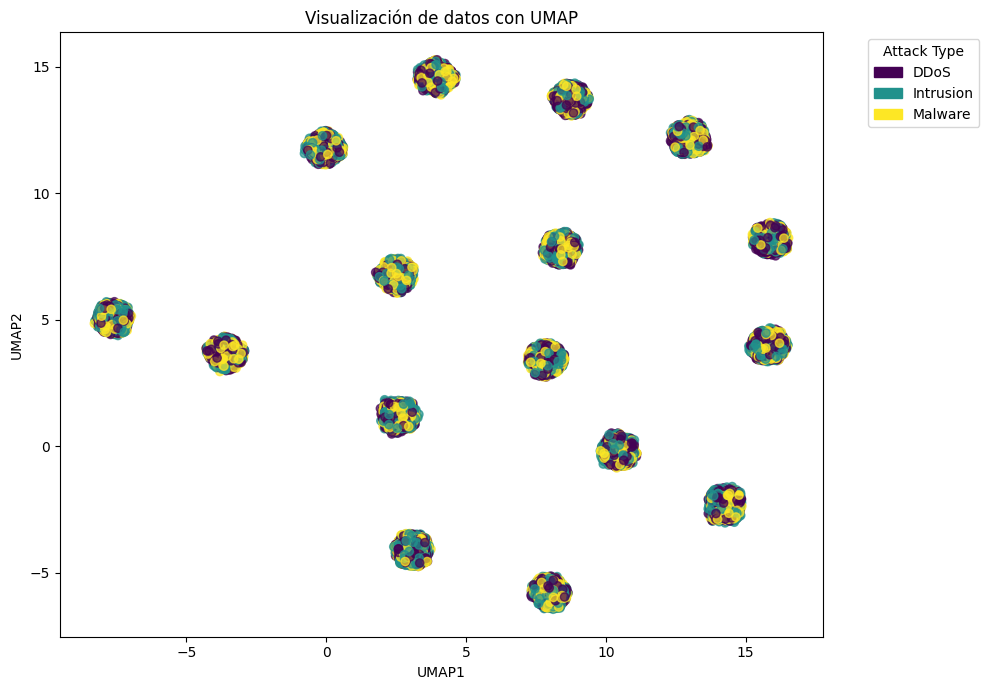

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt

print(df.columns)  # Para confirmar

cat_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Signature', 'Action Taken',
            'Severity Level', 'Network Segment', 'Proxy_Simple', 'SO', 'Browser']  # Quité 'region'

num_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
            'Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Firewall Logs', 'Triple_Alert']

# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = ohe.fit_transform(df[cat_cols])

# Escalado variables numéricas
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_cols])

# Combinar
X = np.hstack([num_scaled, cat_encoded])

# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"Dimensionalidad después de PCA: {X_pca.shape}")

# UMAP 2D
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_pca)

# Graficar
le = LabelEncoder()
labels = le.fit_transform(df['Attack Type'])

import matplotlib.patches as mpatches

plt.figure(figsize=(10,7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Crear parches para la leyenda manualmente:
unique_labels = le.classes_
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(unique_labels) - 1)) for i in range(len(unique_labels))]
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]

plt.legend(handles=patches, title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Visualización de datos con UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.tight_layout()
plt.show()